<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/regressao/alura_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# [Beer Consumption - Sao Paulo: Predict beer consumption](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/geocarvalho/python-ds/master/alura/regressao/Consumo_cerveja.csv", sep=';')
df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [3]:
df.shape

(365, 7)

In [4]:
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [5]:
# Matriz de correlação
df.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# Comportamento da variável dependente (y)

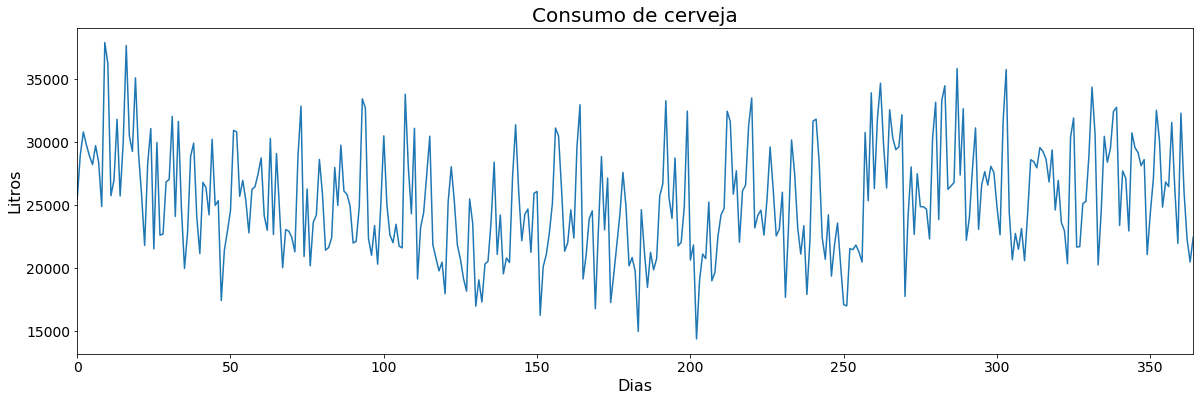

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = df['consumo'].plot(fontsize=14)

Text(0, 0.5, 'Litros')

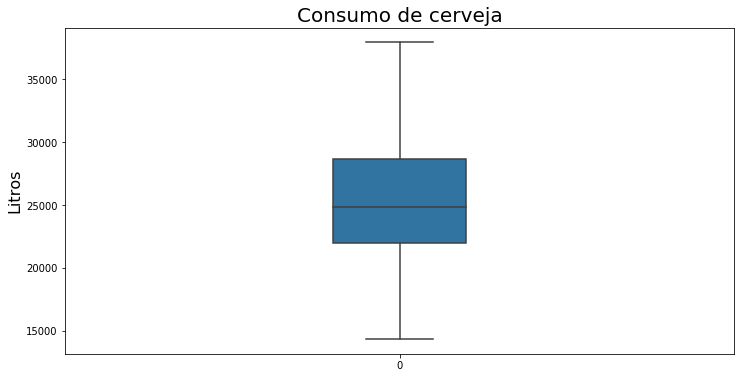

In [7]:
# Boxplot
import seaborn as sns

ax = sns.boxplot(data=df['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)


* Pode identificar assimetrias
![assimetria](https://caelum-online-public.s3.amazonaws.com/860-data-science-modelo-regressao-linear/02/image3.png)


Text(0.5, 0, 'FDS')

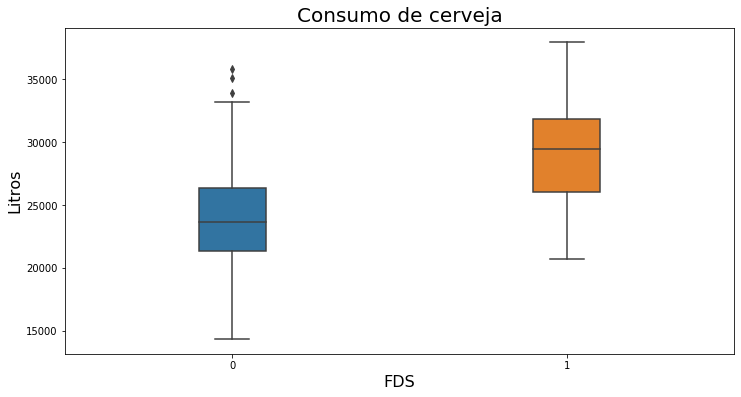

In [8]:
# Boxplot multiplas variaveis
ax = sns.boxplot(y='consumo', x='fds', data=df, orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('FDS', fontsize=16)

In [0]:
# Paleta de cores
sns.set_palette('Accent')
sns.set_style('dark')

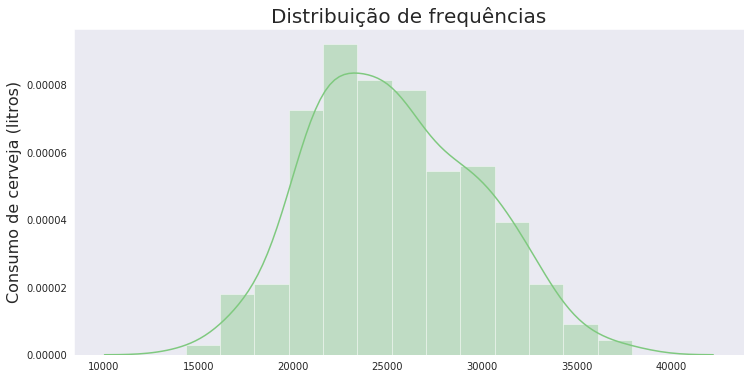

In [10]:
# Distribuição de frequência da variável dependente
ax = sns.distplot(df['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_ylabel('Consumo de cerveja (litros)', fontsize=16)
ax.set_xlabel('', fontsize=16)
plt.show()

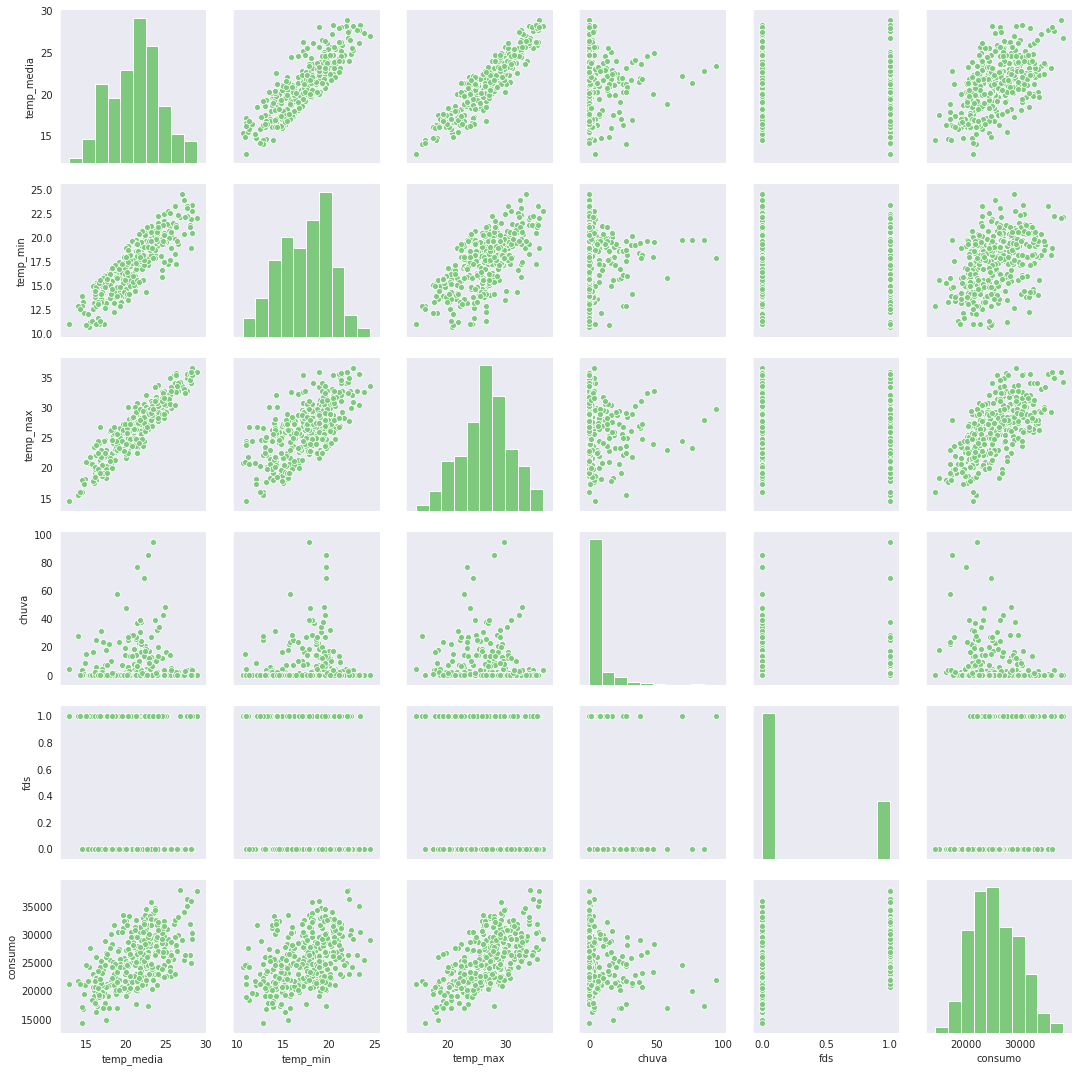

In [11]:
# Variável dependente X variáveis explicativas (pairplot)

ax = sns.pairplot(df)

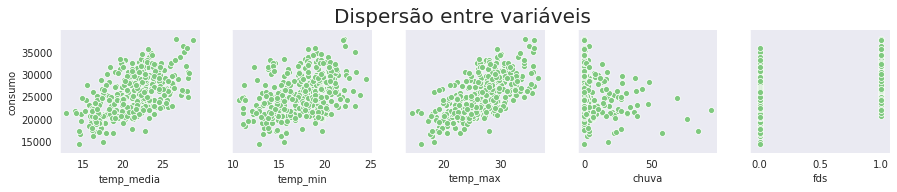

In [12]:
# Plot fixado numa variável no eixo y
variaveis = [x for x in df.columns if x not in ['data', 'consumo']]
ax = sns.pairplot(df, y_vars='consumo', x_vars=variaveis)
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
plt.show()

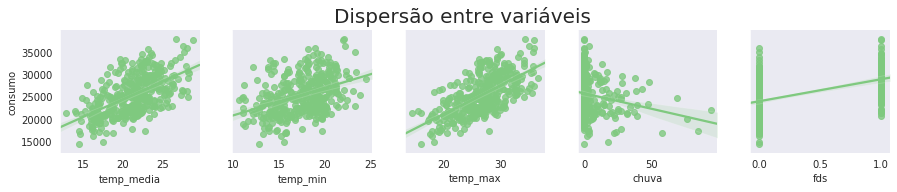

In [13]:
# Plot fixado numa variável no eixo y
variaveis = [x for x in df.columns if x not in ['data', 'consumo']]
ax = sns.pairplot(df, y_vars='consumo', x_vars=variaveis, kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
plt.show()

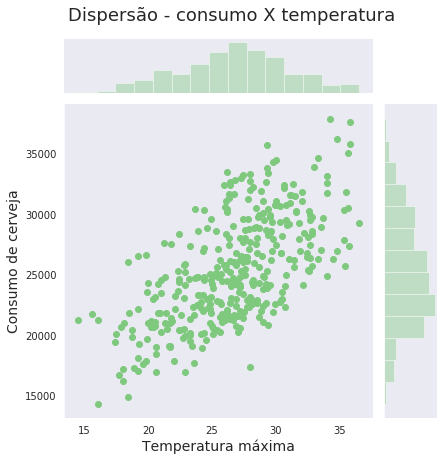

In [14]:
# Variável dependente X variáveis explicativas (joinplot)

ax = sns.jointplot(x='temp_max', y='consumo', data=df)
ax.fig.suptitle('Dispersão - consumo X temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura máxima', 'Consumo de cerveja', fontsize=14)
plt.show()


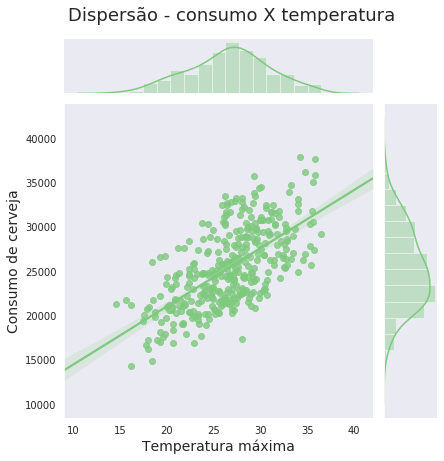

In [15]:
# Variável dependente X variáveis explicativas (joinplot)

ax = sns.jointplot(x='temp_max', y='consumo', data=df, kind='reg')
ax.fig.suptitle('Dispersão - consumo X temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura máxima', 'Consumo de cerveja', fontsize=14)
plt.show()


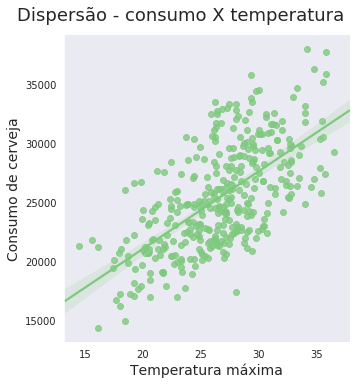

In [16]:
# Variável dependente X variáveis explicativas (lmplot)

ax = sns.lmplot(x='temp_max', y='consumo', data=df)
ax.fig.suptitle('Dispersão - consumo X temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura máxima', fontsize=14)
ax.set_ylabels('Consumo de cerveja', fontsize=14)
plt.show()


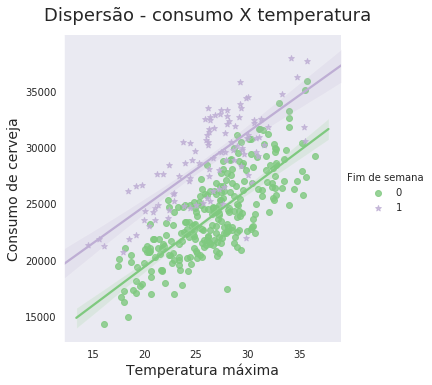

In [17]:
ax = sns.lmplot(x='temp_max', y='consumo', data=df, hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Dispersão - consumo X temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura máxima', fontsize=14)
ax.set_ylabels('Consumo de cerveja', fontsize=14)
ax.add_legend(title='Fim de semana')
plt.show()


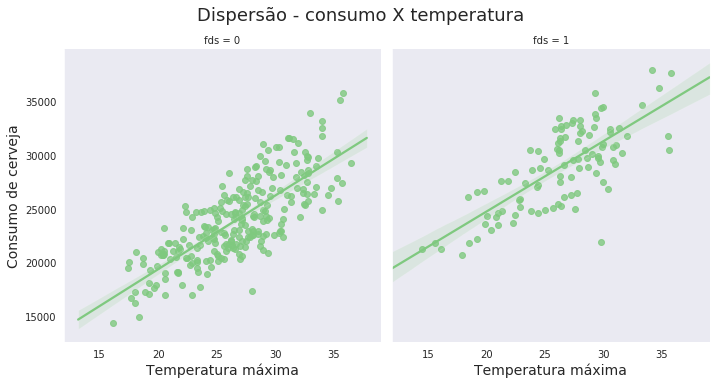

In [18]:
ax = sns.lmplot(x='temp_max', y='consumo', data=df, col='fds')
ax.fig.suptitle('Dispersão - consumo X temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura máxima', fontsize=14)
ax.set_ylabels('Consumo de cerveja', fontsize=14)
plt.show()

# Estimando um modelo de regressão linear para o consumo

In [19]:
from sklearn.model_selection import train_test_split

y = df['consumo']
X = df[['temp_max', 'chuva', 'fds']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255, 3), (110, 3), (255,), (110,))

# Regressão linear para três variáveis explicativas (multipla)

$Y_i = \beta_1 + \beta_2 X_{2i} + \beta_3 X_{3i} + \beta_4 X_{4i} + \mu_i$

Onde:

$\beta_1$: é o intercept, local onde o eixo y é cortado pela reta de regressão;
$\beta_2,\beta_3,\beta_4$: são os coeficientes angulares parciais;
$X_2,X_3,X_4$: são as variáveis explicativas (`temp_max`, `chuva`, `fds`);
$\mu_i$: é o termo de erro, o quanto da variação de $Y_i$ que não conseguiu ser explicada pela função


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

* Medida resumida que diz o quanto a linha de regressão ajusta-se aos dados (valor entre 0 e 1, mais próximo de 1 melhor).
w
$R^2(y,\hat{y}) = 1 - \frac{\sum^{n-1}_{i=0} (y_i - \hat{y}_i)^2}{\sum^{n-1}_{i=0} (y_i - \bar{y}_i)^2}$


In [21]:
print('R² = {}'.format(lr.score(X_train, y_train).round(2)))

R² = 0.73


In [22]:
# Gerando previsões para os dados de teste

predict = lr.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, predict).round(2))

R² = 0.69


# Obtendo previsões pontuais


In [23]:
input = X_test[0:1]
lr.predict(input)[0]

26094.901775262017

In [24]:
# Simulador
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(lr.predict(entrada)[0]))

26094.90 litros


# Interpretação dos coeficientes estimados

* O **intercepto** representa o efeito médio em $Y$ (consumo de cerveja) tendo todas as variáveis explicativas excluídas do modelo. Assim, representa o efeito médio em $Y$ quando $X_2$ (temperatura máxima), $X_3$ (chuva) e $X_4$ (final de semana são iguais a zero.

In [25]:
lr.intercept_

5951.976339312445

* Os **coeficientes de regressão** $\beta2,\beta3$ e $\beta4$ são chamados de **coeficientes parciais de regressão** ou **coeficientes parciais angulares**. $\beta_i$ mede a variação no valor médio de $Y$ por unidade de variação em $X_i$ mantendo-se valores de $X_{3}$ e $X_{4}$ constantes. Ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_i$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$.

In [26]:
lr.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [27]:
index = ['Intercepto', 'Temperatura máxima', 'Chuva', 'Final de semana']
pd.DataFrame(data=np.append(lr.intercept_, lr.coef_), index=index, columns=['Parametros'])

,Parametros
Intercepto,5951.976339
Temperatura máxima,684.736759
Chuva,-60.782435
Final de semana,5401.083339


# Análises gráficas das previsões do modelo

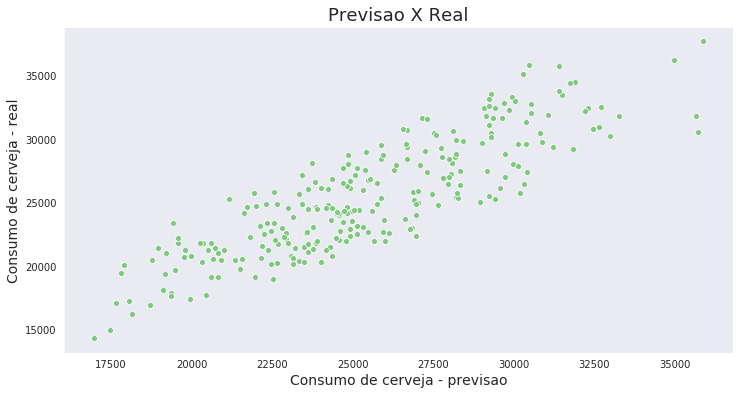

In [28]:
prediction = lr.predict(X_train)

ax = sns.scatterplot(x=prediction, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('Consumo de cerveja - previsao', fontsize=14)
ax.set_ylabel('Consumo de cerveja - real', fontsize=14)
plt.show()

# Obtendo os resíduos
* Método informa a verificação da hipótese de variância constante dos resíduos (homocedasticidade)

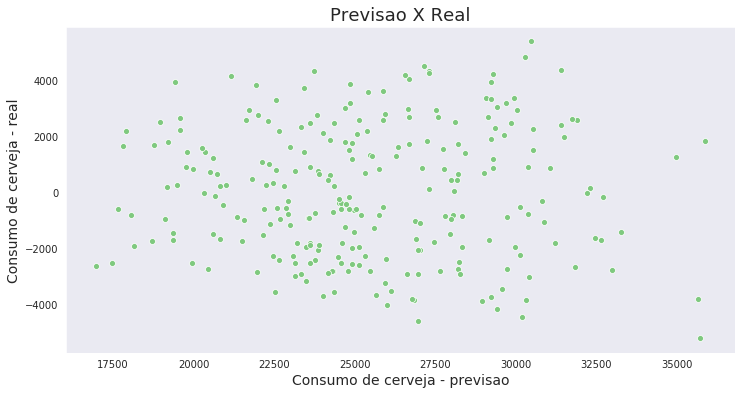

In [29]:
residuo = y_train - prediction

ax = sns.scatterplot(x=prediction, y=residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('Consumo de cerveja - previsao', fontsize=14)
ax.set_ylabel('Consumo de cerveja - real', fontsize=14)
plt.show()

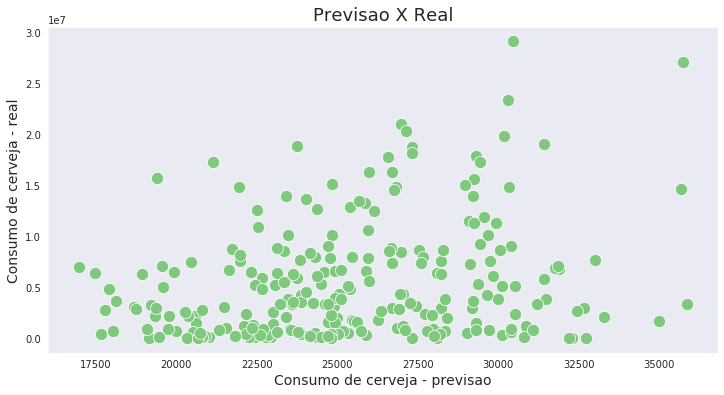

In [30]:
ax = sns.scatterplot(x=prediction, y=residuo**2, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('Consumo de cerveja - previsao', fontsize=14)
ax.set_ylabel('Consumo de cerveja - real', fontsize=14)
plt.show()

# Plotando a distribuição de frequências dos resíduos


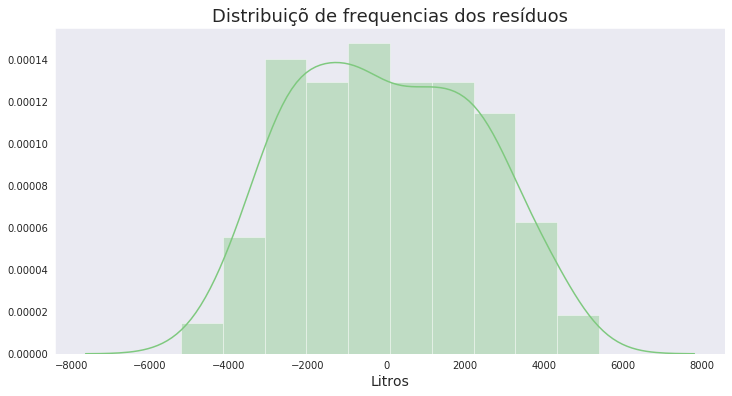

In [31]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuiçõ de frequencias dos resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
plt.show()

# Comparando modelos

In [32]:
X2 = df[['temp_media', 'chuva', 'fds']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Modelo com temp_max
print('R² = {}'.format(lr.score(X_train, y_train).round(2)))

R² = 0.73


In [34]:
# Modelo com temp_media
print('R² = {}'.format(lr2.score(X2_train, y2_train).round(2)))

R² = 0.66


In [35]:
y_predict = lr.predict(X_test)
y2_predict = lr2.predict(X2_test)

# Modelo com temp_max
print('R² = {}'.format(metrics.r2_score(y2_test, y2_predict).round(2)))

R² = 0.66


In [36]:

# Modelo com temp_max
print('R² = {}'.format(metrics.r2_score(y_test, y_predict).round(2)))

R² = 0.69


# Outras métricas de regressão
## Erro quadrático médio

Média dos quadrados dos erros, ajustes melhores apresentam EQM mais baixo

$EQM(y,\hat{y}) = \frac{1}{n} \sum^{n=1}_{i=0}(y_i - \hat{y}_i)^2$

## Raiz do erro quadrático médio

Raiz quadrada da média dos quadradosdos erros, ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$\sqrt{EQM(y,\hat{y})} = \sqrt{\frac{1}{n} \sum^{n=1}_{i=0}(y_i - \hat{y}_i)^2}$

In [40]:
# Modelo com temp_media
eqm2 = metrics.mean_squared_error(y2_test, y2_predict)
reqm2 = np.sqrt(eqm2)

r2_2 = metrics.r2_score(y2_test, y2_predict)

pd.DataFrame([eqm2, reqm2, r2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6.060775e+06
REQM,2.461864e+03
R²,6.574589e-01


In [41]:
# Modelo com temp_max
eqm = metrics.mean_squared_error(y_test, y_predict)
reqm = np.sqrt(eqm2)

r2 = metrics.r2_score(y_test, y_predict)

pd.DataFrame([eqm, reqm, r2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5.471976e+06
REQM,2.461864e+03
R²,6.907365e-01


#  Salvando e carregando o modelo estimado

## Pickle

* Implementa protocolos binários para serializar e desserializar a estrutura de um objeto python

In [0]:
import pickle

output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(lr, output)
output.close()

In [0]:
from google.colab import files
files.download('modelo_consumo_cerveja') 

In [43]:
# Code to open and use the pickle

import pickle

modelo = open('modelo_consumo_cerveja', 'rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))


/bin/bash: -c: line 0: syntax error near unexpected token `http://'
/bin/bash: -c: line 0: `[](http://)<a href="./modelo_consumo_cerveja"> Download File </a>'
